<h1>Prediction of customer churn in a telecommunications company

In [235]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv(r'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\raw\IBM_CHURN.csv', index_col = 'Unnamed: 0')

#### About the dataset:

Each row represents a customer, each column contains customer’s attributes described as follows:
- CustomerID : customer identification number
- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not in the last month (Yes or No)



<h3> 1. Let's load the Dataset and take an overview of it

In [237]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Reason
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved


In [238]:
df.shape

(7043, 22)

Changing the order of the columns , and placing Churn at the end

In [239]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn Reason'],
      dtype='object')

In [240]:
orden =['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn Reason',
       'Churn']
df = df[orden]

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

In [242]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convert Dtypes

In [243]:
#TotalCharges is a numerical feature, but it's read as object
mask = df[df['TotalCharges'] == ' ']
mask_index = mask.index
df.loc[mask_index, 'TotalCharges'] = 0


In [244]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

<h3> 2. Missing values

The only column with Nan values is 'Churn Reason', let's see how to solve it

In [245]:
# checking the percentage of Nan in the column
df['Churn Reason'].isna().sum()*100/len(df['Churn Reason'])

73.46301292063042

In [246]:
# the percentage of Nan is very high so we drop the column
df = df.drop('Churn Reason', axis=1)

<h3> 3. Univariate analysis

Let's check if the target ('Churn') is balanced

In [247]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

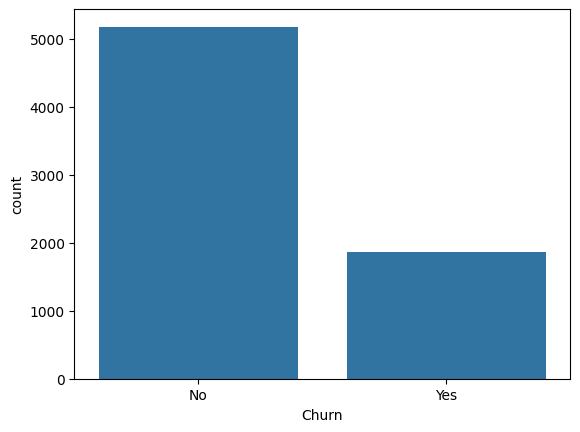

In [248]:
sns.countplot(x="Churn", data=df)


(-1.0999953955046675,
 1.0999997807383175,
 -1.099999639859933,
 1.0999975337506098)

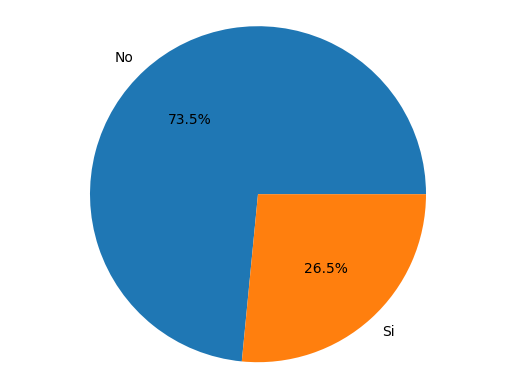

In [249]:
plt.pie(df.Churn.value_counts(), labels=['No', 'Si'], autopct='%1.1f%%')
plt.axis('equal')

We see it is highly unbalanced, we will have to use the appropriate metric (precision , f1-score)

Now let's take a look to the other main variables

C:\Users\lour2\AppData\Local\Temp\ipykernel_1288\2879224500.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Hombre', 'Mujer'])


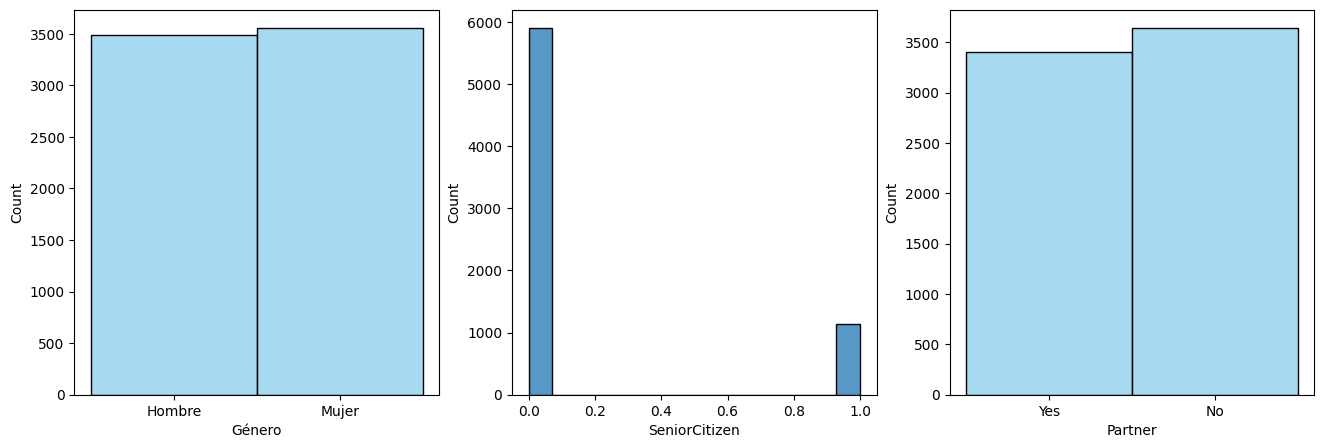

In [250]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['gender'], ax=axes[0], color = 'skyblue' )
axes[0].set_xticklabels(['Hombre', 'Mujer'])
axes[0].set_xlabel('Género')
sns.histplot(df['SeniorCitizen'], ax=axes[1])
sns.histplot(df['Partner'], ax=axes[2], color = 'skyblue');

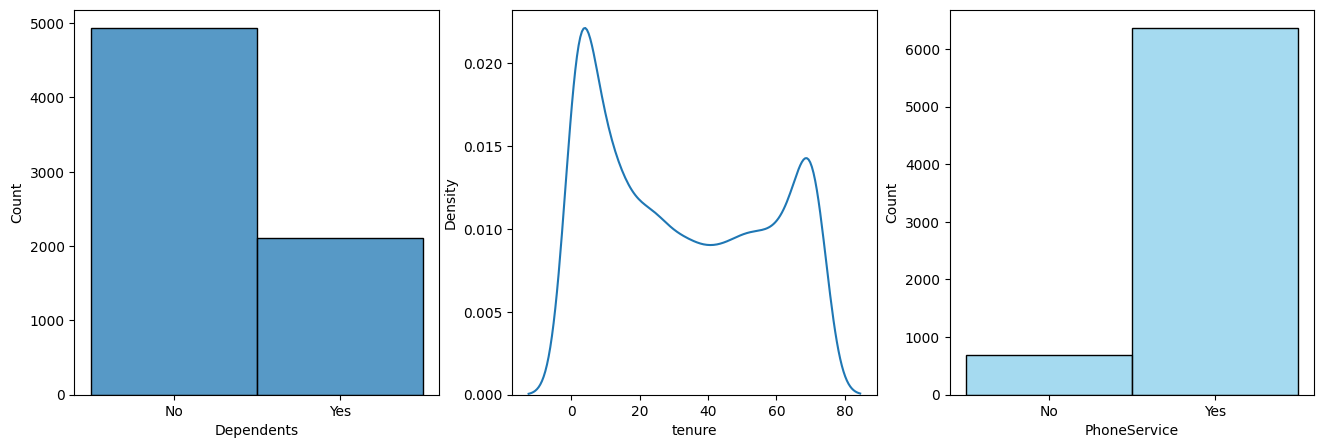

In [251]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['Dependents'], ax=axes[0])
sns.kdeplot(data = df['tenure'], ax=axes[1])
sns.histplot(df['PhoneService'], ax=axes[2],color = 'skyblue');

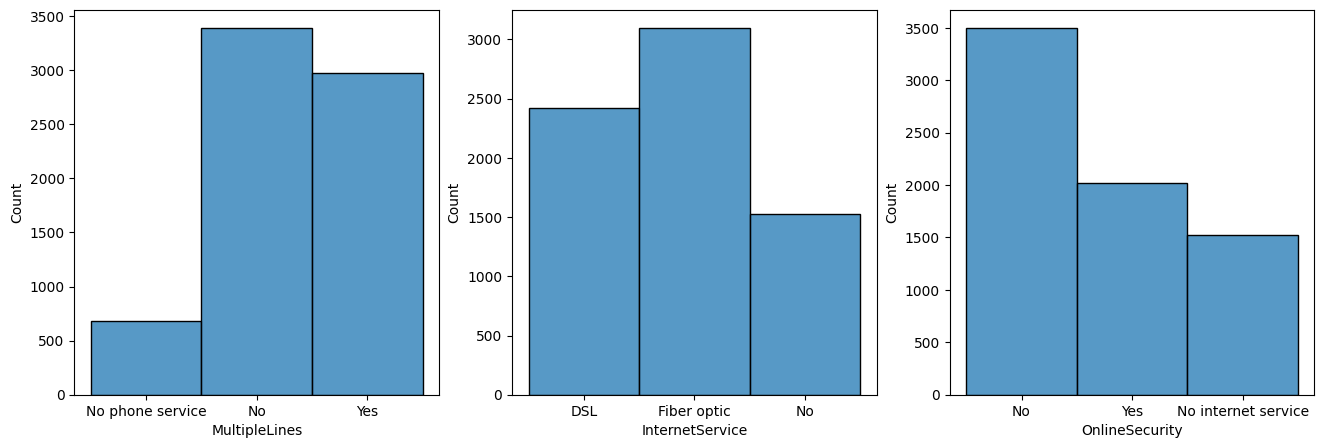

In [252]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['MultipleLines'], ax=axes[0])
sns.histplot(df['InternetService'], ax=axes[1])
sns.histplot(df['OnlineSecurity'], ax=axes[2]);

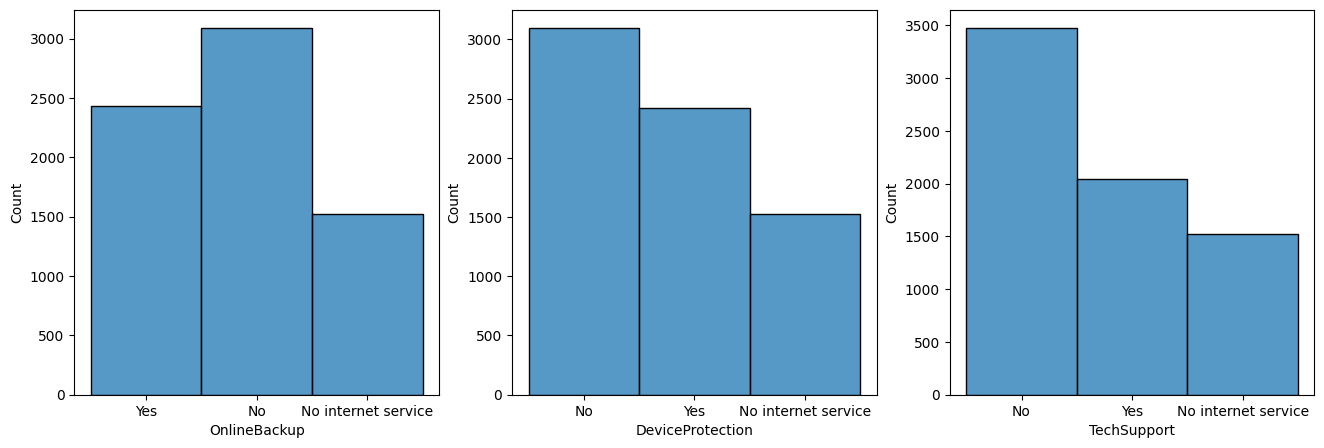

In [253]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['OnlineBackup'], ax=axes[0])
sns.histplot(df['DeviceProtection'], ax=axes[1])
sns.histplot(df['TechSupport'], ax=axes[2]);

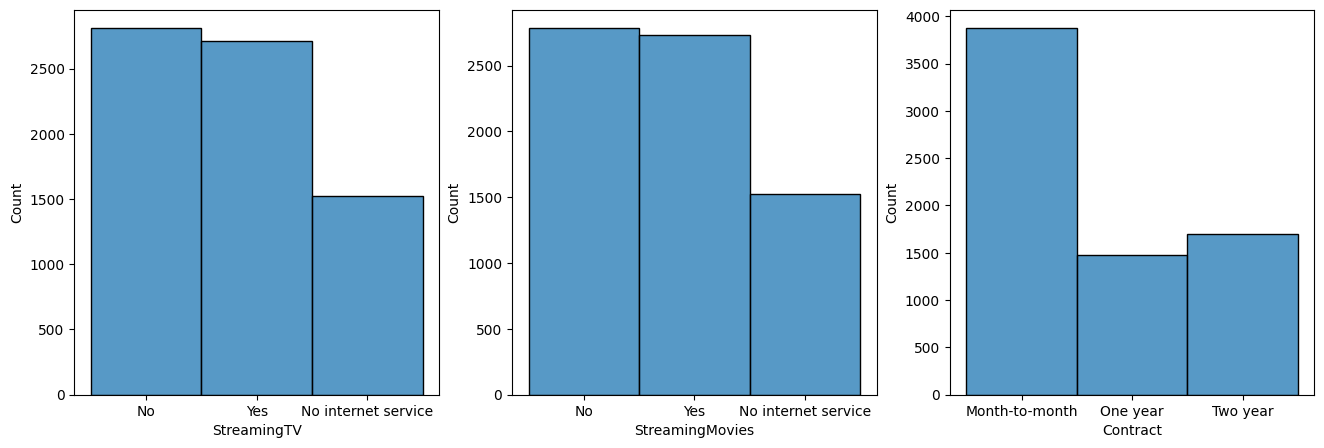

In [254]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['StreamingTV'], ax=axes[0])
sns.histplot(df['StreamingMovies'], ax=axes[1])
sns.histplot(df['Contract'], ax=axes[2]);

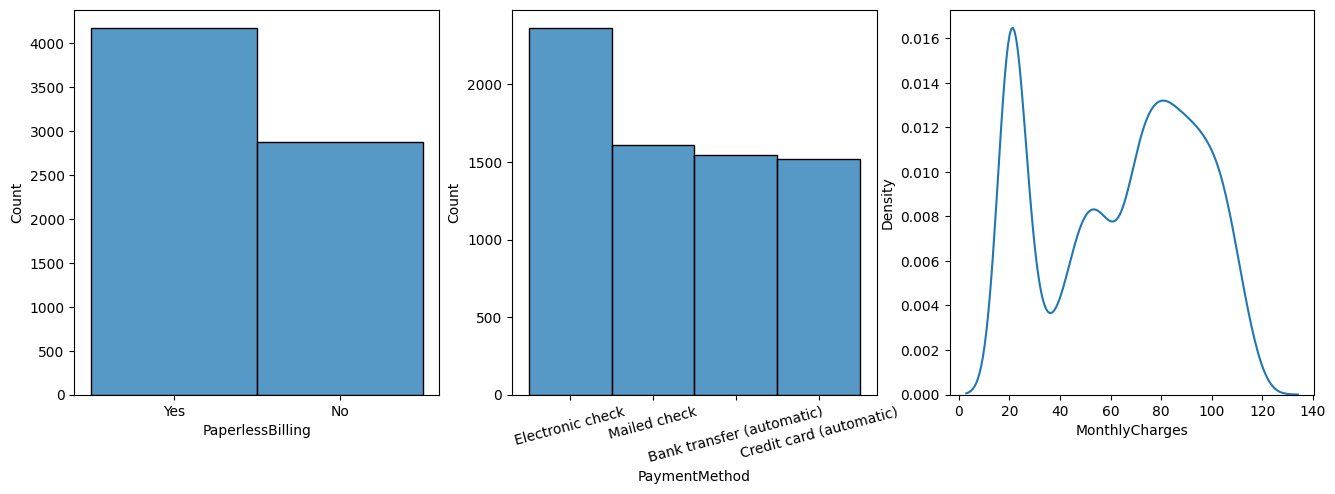

In [255]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['PaperlessBilling'], ax=axes[0])
sns.histplot(df['PaymentMethod'], ax=axes[1])
axes[1].tick_params(axis='x', rotation=15)
sns.kdeplot(df['MonthlyCharges'], ax=axes[2]);

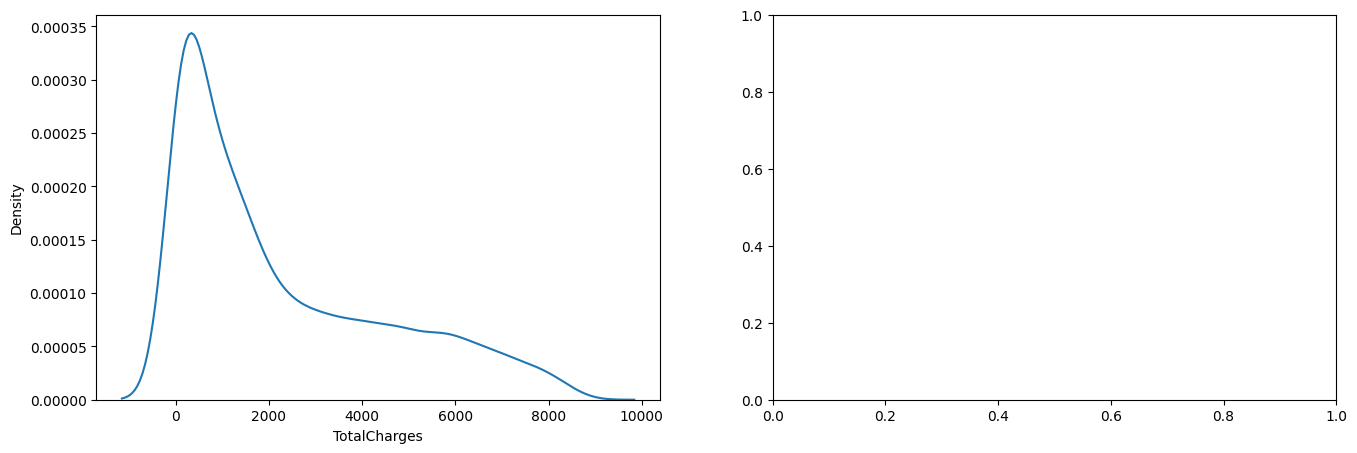

In [256]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.kdeplot(df['TotalCharges'], ax= axes[0]);

Conclusions:
- From the graphic tenure we see that most of the clients leave within the first year
- StreaminTV and StreamingMovies have almost the same distribution, so it seems that the column is redundant

Actions:
- Tenure, MonthlyCharges and TotalCharges is not normally distributed and symmetric, we will have to transform the data of this column 
- We could simplify PaymentMethod values to 'automatic' and 'non automatic'



In [257]:
from scipy.stats import shapiro
from scipy.stats import skew

# much below the significance level (0.05) is not considered a normal distribution.
print("Saphiro:", shapiro(df.tenure).pvalue)
print("Saphiro:", shapiro(df.MonthlyCharges.values).pvalue)
print("Saphiro:", shapiro(df.TotalCharges).pvalue)

# To check the asymmetry of a variable we can always calculate its skew value
# 0 if symmetrical, >0 tail to the right, <0 tail to the left


print("Asymmetry:", skew(df.tenure))
print("Asymmetry:", skew(df.MonthlyCharges))
print("Asymmetry:", skew(np.log(df.TotalCharges)))

Saphiro: 0.0
Saphiro: 0.0
Saphiro: 0.0
Asymmetry: 0.2394887299846216
Asymmetry: -0.2204774644391769
Asymmetry: nan


c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\scipy\stats\_stats_py.py:954: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [258]:
payment = {'Electronic check':'Non automatic', 'Mailed check':'Non automatic', 'Bank transfer (automatic)':'Automatic', 'Credit card (automatic)': 'Automatic'}
df['PaymentMethod'] = df['PaymentMethod'].map(payment)

<Axes: xlabel='PaymentMethod', ylabel='Count'>

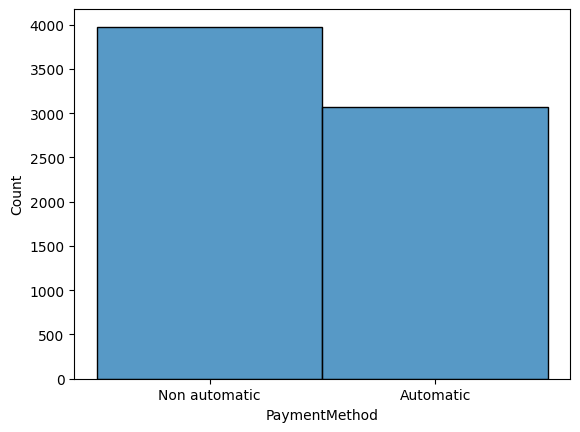

In [259]:
sns.histplot(df['PaymentMethod'])

<h3> 4. Bivariate analysis

Now , lets take a look at all the variables with the target

In [260]:
for columna in df.columns:
    conteo = df[columna].value_counts()
    print(f"Value counts para la columna '{columna}':\n{conteo}\n")

Value counts para la columna 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Value counts para la columna 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts para la columna 'SeniorCitizen':
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Value counts para la columna 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts para la columna 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts para la columna 'tenure':
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Value counts para la columna 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value count

Let's plot how the target is distributed in every column

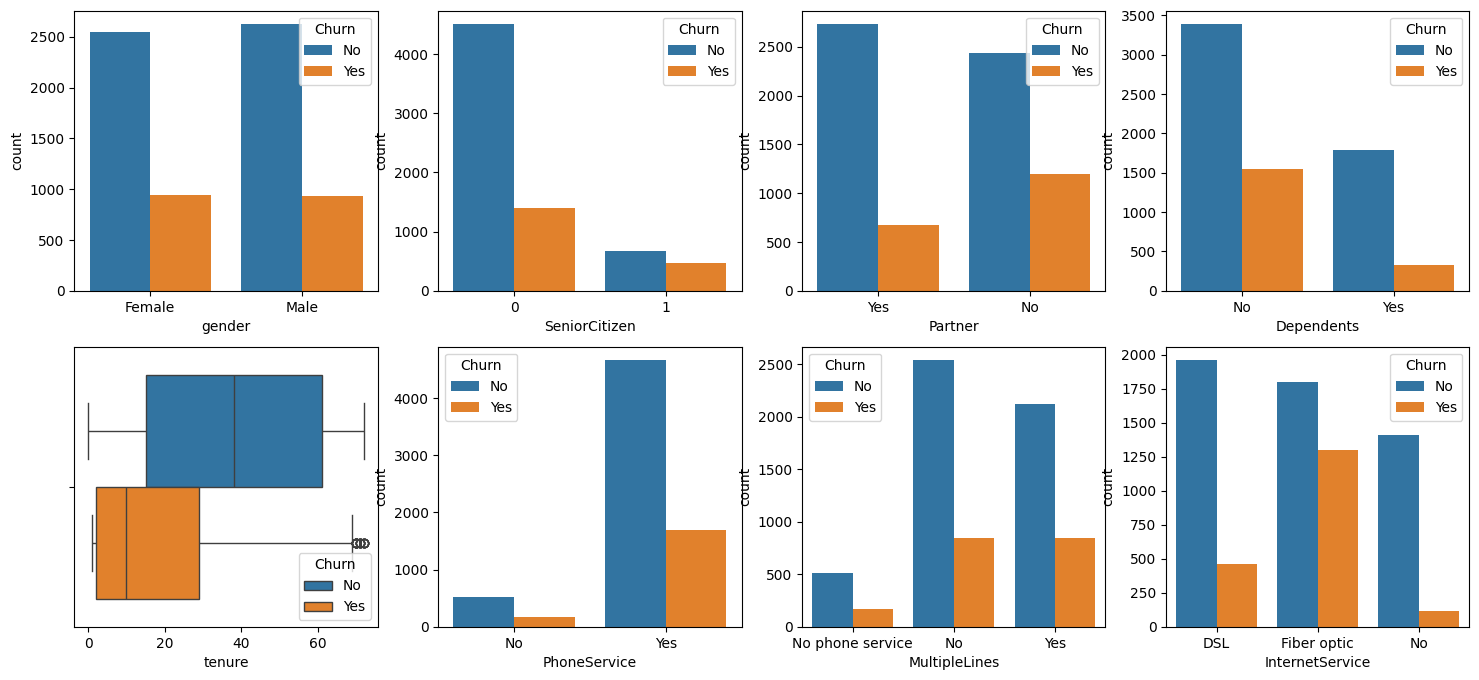

In [261]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 4, 1)
sns.countplot(x='gender', hue='Churn', data=df)
plt.subplot(2, 4, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.subplot(2, 4, 3)
sns.countplot(x='Partner', hue='Churn', data=df)
plt.subplot(2, 4, 4)
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='tenure', hue='Churn', data=df)
plt.subplot(2, 4, 6)
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.subplot(2, 4, 7)
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.subplot(2, 4, 8)
sns.countplot(x='InternetService', hue='Churn', data=df);

C:\Users\lour2\AppData\Local\Temp\ipykernel_1288\1827508566.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['ADSL', 'Fibra óptica', 'Sin internet'])


Text(0.5, 0, 'Servicio internet')

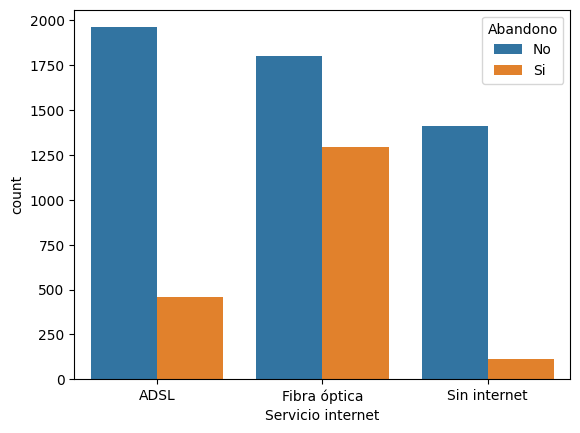

In [262]:
ax = sns.countplot(x='InternetService', hue='Churn', data=df)
plt.legend(title='Abandono', labels=['No', 'Si'])
ax.set_xticklabels(['ADSL', 'Fibra óptica', 'Sin internet'])
ax.set_xlabel('Servicio internet')

Text(0.5, 0, 'Permanencia')

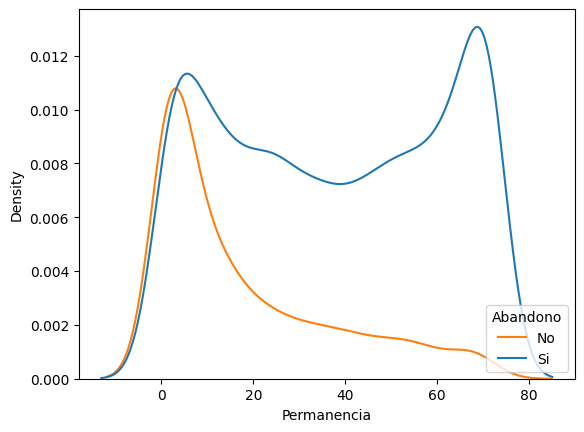

In [263]:
ax = sns.kdeplot(x='tenure', hue='Churn', data=df)
legend = plt.legend(title='Abandono', labels=['No', 'Si'])
legend.set_loc('lower right')
#ax.set_xticklabels(['No', 'Si'])
ax.set_xlabel('Permanencia')

C:\Users\lour2\AppData\Local\Temp\ipykernel_1288\2722111257.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Si'])


Text(0.5, 0, 'Servicio móvil')

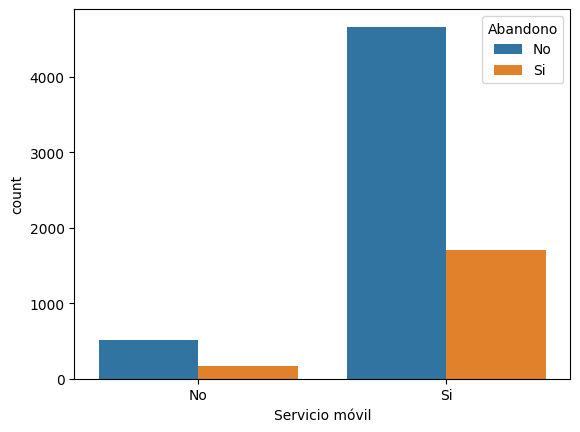

In [264]:
ax = sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.legend(title='Abandono', labels=['No', 'Si'])
ax.set_xticklabels(['No', 'Si'])
ax.set_xlabel('Servicio móvil')

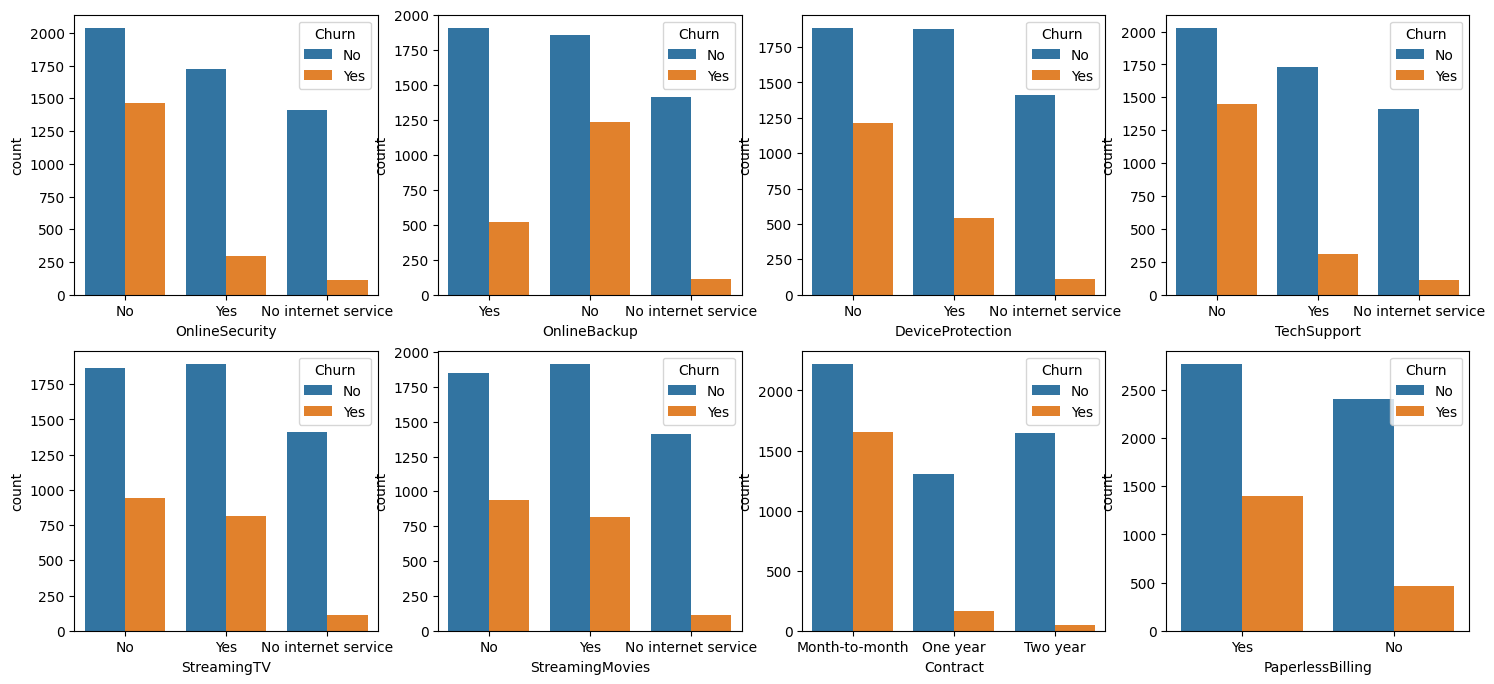

In [265]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 4, 1)
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.subplot(2, 4, 2)
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.subplot(2, 4, 3)
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.subplot(2, 4, 4)
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.subplot(2, 4, 5)
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.subplot(2, 4, 6)
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.subplot(2, 4, 7)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.subplot(2, 4, 8)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df);


C:\Users\lour2\AppData\Local\Temp\ipykernel_1288\2937513742.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Si', 'Sin internet'])


Text(0.5, 0, 'Seguridad online')

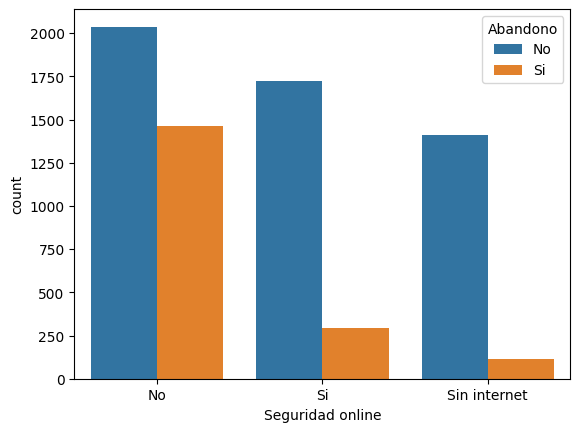

In [266]:
ax = sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.legend(title='Abandono', labels=['No', 'Si'])
ax.set_xticklabels(['No', 'Si', 'Sin internet'])
ax.set_xlabel('Seguridad online')

C:\Users\lour2\AppData\Local\Temp\ipykernel_1288\3319489248.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Si', 'Sin internet'])


Text(0.5, 0, 'Soporte técnico')

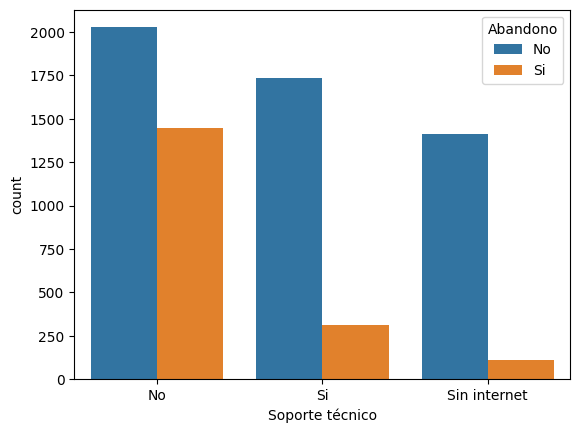

In [267]:
ax = sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.legend(title='Abandono', labels=['No', 'Si'])
ax.set_xticklabels(['No', 'Si', 'Sin internet'])
ax.set_xlabel('Soporte técnico')

C:\Users\lour2\AppData\Local\Temp\ipykernel_1288\847128915.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Mes a mes', 'Un año', 'Dos años'])


Text(0.5, 0, 'Contrato')

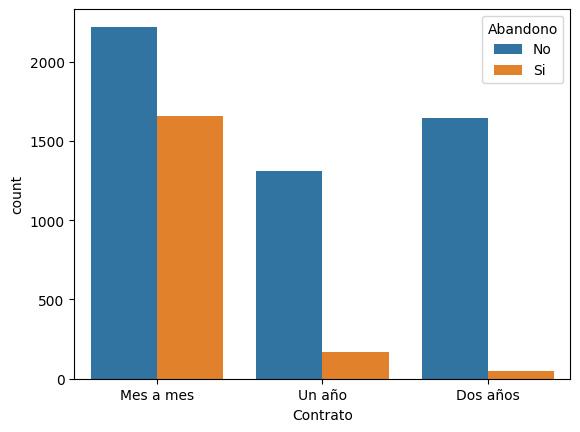

In [268]:
ax = sns.countplot(x='Contract', hue='Churn', data=df)
plt.legend(title='Abandono', labels=['No', 'Si'])
ax.set_xticklabels(['Mes a mes', 'Un año', 'Dos años'])
ax.set_xlabel('Contrato')


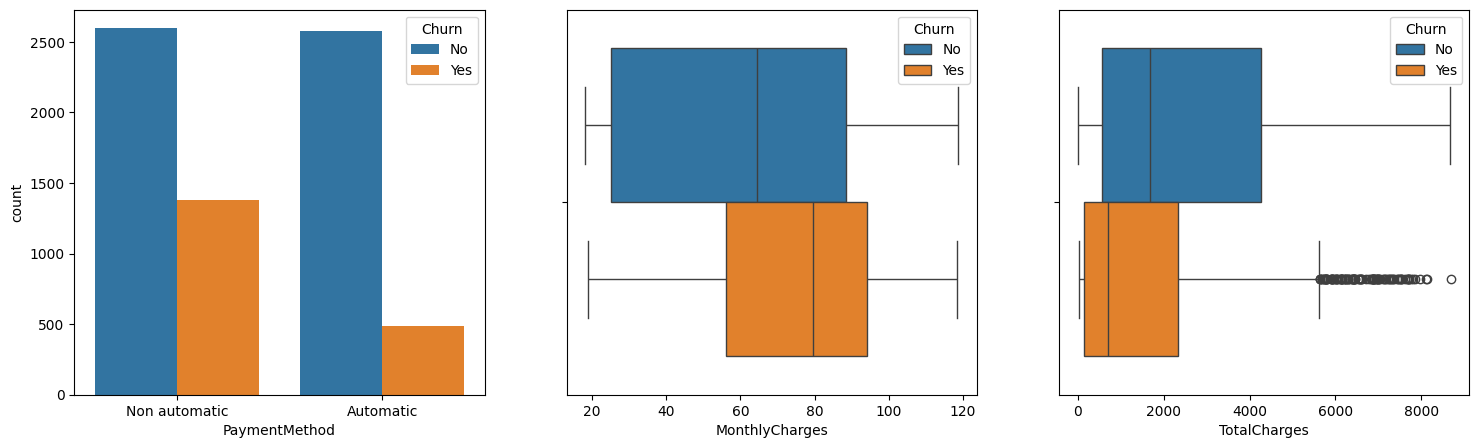

In [269]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='MonthlyCharges', hue='Churn', data=df)
plt.subplot(1, 3, 3)
sns.boxplot(x='TotalCharges', hue='Churn', data=df);


Conclusions:
- There might be outliers in TotalCharges column
- Some columns , such us customerId, gender, StreamingTv have no relevant information

Actions:

Outliers<br>
- TotalCharges has a lot of values far from the average

In [270]:
df.loc[:,['TotalCharges','tenure']].sort_values(by = 'TotalCharges')
# They correspond to the clients who have been in the company longer, so the are not outliers

,TotalCharges,tenure
3826,0.00,0
5218,0.00,0
4380,0.00,0
753,0.00,0
488,0.00,0
...,...,...
2187,8564.75,71
5347,8594.40,72
6768,8670.10,72
4586,8672.45,72


In [271]:
# we check that people with 0 TotalCharges are in the first month, so we replace 0 values for 'MonthlyCharges'
mask = df[df['TotalCharges'] == 0]
df.loc[mask.index, 'TotalCharges'] = df.loc[mask.index, 'MonthlyCharges']

Drop columns <br>
Based on the info above, we decide to drop:
- 'customerId' due to its high cardinality
- 'gender': churn is equally distributed by gender, so it does not help to predict
- 'StreamingTV' and 'StreamingMovies' are practically identical



In [272]:
df = df.drop(['customerID', 'gender', 'StreamingTV'], axis = 1)


<h3>5. Encodings

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64
 17  

In [274]:
df.Partner = df.Partner.apply(lambda x : 0 if x == 'No' else 1 )
df.Dependents = df.Dependents.apply(lambda x : 0 if x == 'No' else 1)
df.PhoneService = df.PhoneService.apply(lambda x : 0 if x == 'No' else 1)
df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
df.InternetService = df.InternetService.map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df.OnlineSecurity = df.OnlineSecurity.map({'No internet service': 0, 'No': 0, 'Yes': 1})
df.OnlineBackup = df.OnlineBackup.map({'No internet service': 0, 'No': 0, 'Yes': 1})
df.DeviceProtection = df.DeviceProtection.map({'No internet service': 0, 'No': 0, 'Yes': 1})
df.TechSupport = df.TechSupport.map({'No internet service': 0, 'No': 0, 'Yes': 1})
#df.StreamingTV = df.StreamingTV.map({'No internet service': 0, 'No': 1, 'Yes': 2})
df.StreamingMovies = df.StreamingMovies.map({'No internet service': 0, 'No': 0, 'Yes': 1})
df.Contract = df.Contract.map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df.PaperlessBilling = df.PaperlessBilling.map(lambda x : 0 if x == 'No' else 1)
df.PaymentMethod = df.PaymentMethod.map(lambda x : 0 if x == 'Non automatic' else 1)
df.Churn = df.Churn.map(lambda x : 0 if x == 'No' else 1)


In [275]:
df.Churn.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64>

([<matplotlib.patches.Wedge at 0x20b35a99f70>,
 [Text(-0.9733381440257701, 0.5124576639923236, 'No'),
  Text(0.9733380960460164, -0.5124577551228158, 'Yes')])

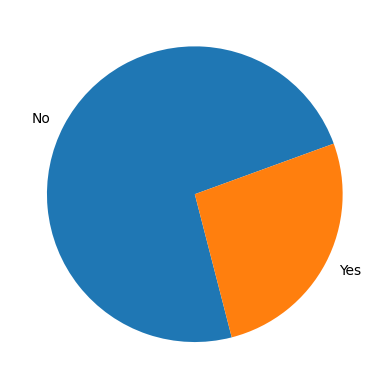

In [276]:
import matplotlib.pyplot as plt
plt.pie(df.Churn.value_counts(), labels = ['No', 'Yes'], startangle=20)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64
 17  

<h3> Correlation matrix

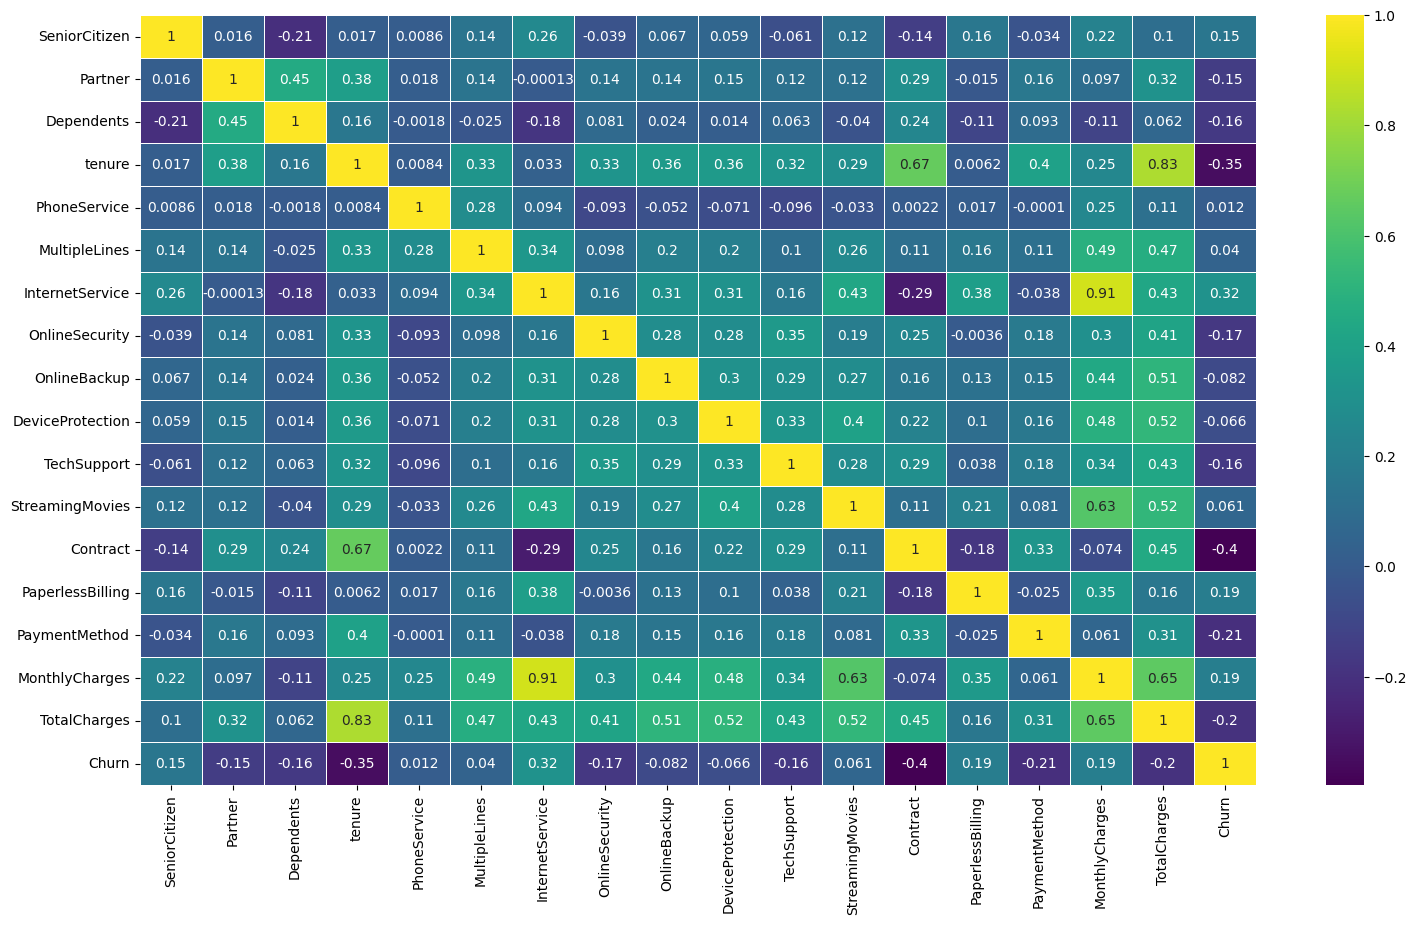

In [278]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),
            cmap='viridis',
            annot=True,
             linewidths=.5);

Deleting columns with low correlation to 'Churn' (< 0.2)

In [279]:
df = df.drop(['SeniorCitizen','Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'MonthlyCharges'], axis = 1)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   InternetService   7043 non-null   int64  
 2   Contract          7043 non-null   int64  
 3   PaperlessBilling  7043 non-null   int64  
 4   PaymentMethod     7043 non-null   int64  
 5   TotalCharges      7043 non-null   float64
 6   Churn             7043 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 698.2 KB


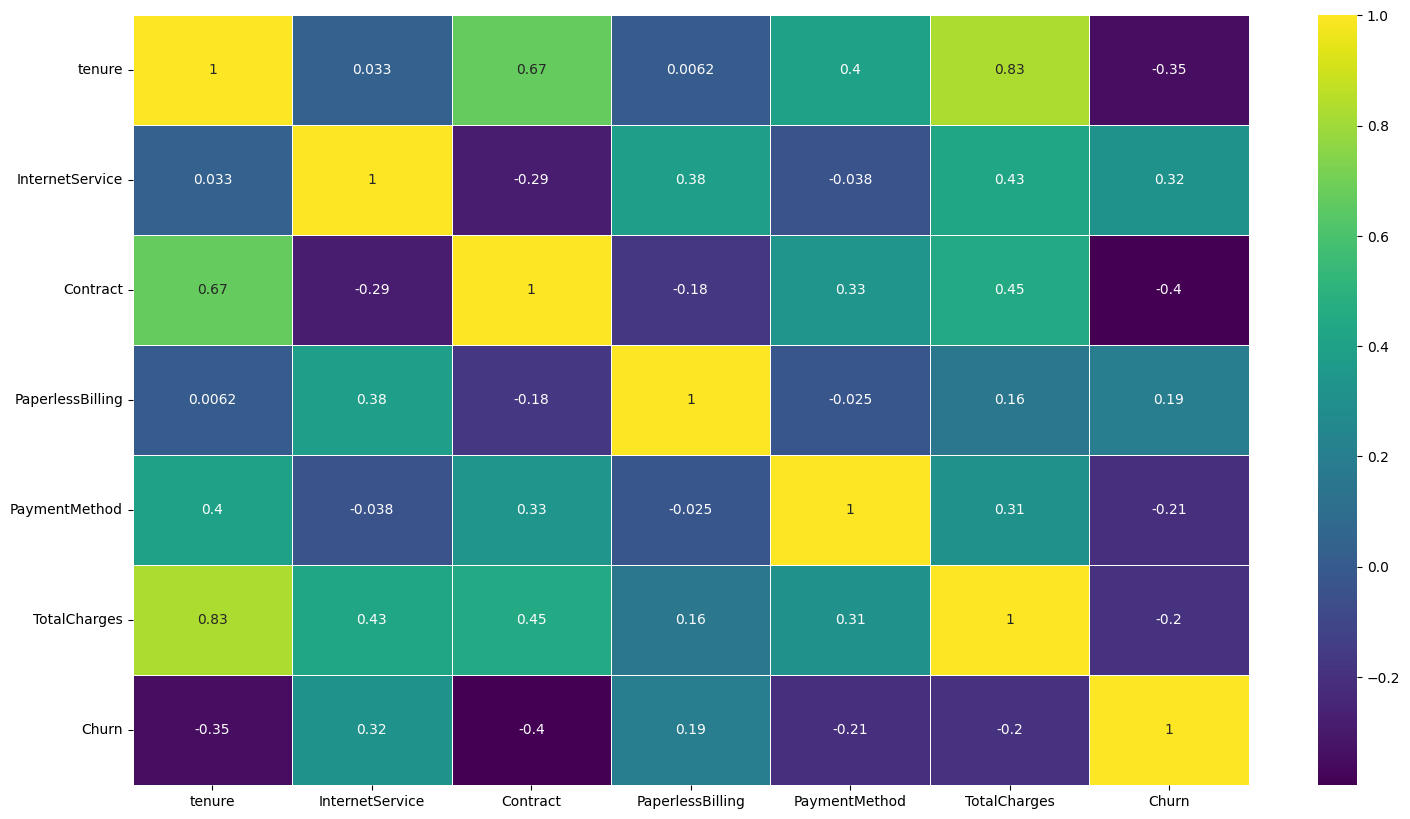

In [281]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),
            cmap='viridis',
            annot=True,
             linewidths=.5);

In [282]:
#ruta = 'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\processed'
df.to_csv(r'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\processed\model_data.csv', index = False)

<h3> 6. Model development

<h3> Split values in train and test

In [287]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle= True, stratify = y)

(-1.0999975293524686,
 1.099999641685759,
 -1.099995395972627,
 1.0999997807606012)

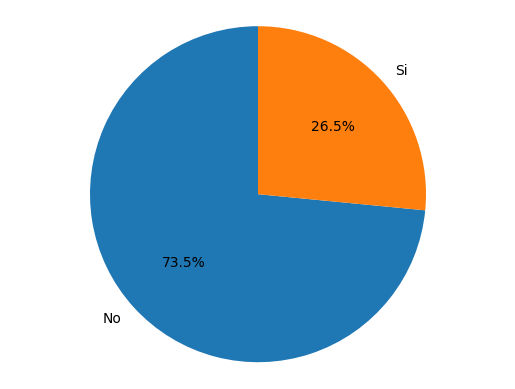

In [288]:
plt.pie(y_train.value_counts(), labels=['No', 'Si'],autopct='%1.1f%%', startangle = 90)
plt.axis('equal')

<h3> Normalize values

In [289]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train1)
X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

Smote technique to balance the target

In [290]:
seed = 42
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
smo = SMOTE(sampling_strategy="auto", random_state = seed)
X_train, y_train = smo.fit_resample(X_train,y_train)

C:\Users\lour2\AppData\Local\Temp\ipykernel_1288\2589985348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y_train.value_counts(), palette= 'tab10')


<Axes: xlabel='Churn', ylabel='count'>

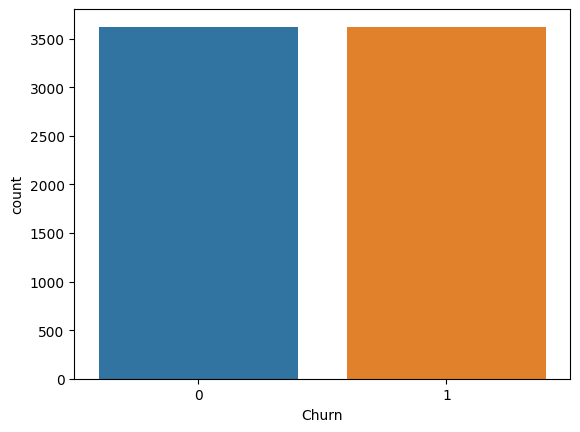

In [291]:
sns.barplot(y_train.value_counts(), palette= 'tab10')

(-1.1, 1.1, -1.1, 1.1)

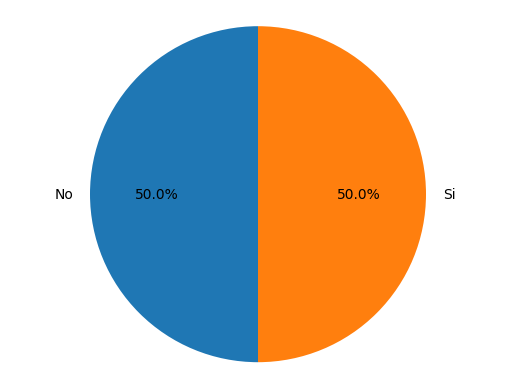

In [292]:
plt.pie(y_train.value_counts(), labels=['No', 'Si'],autopct='%1.1f%%', startangle = 90)
plt.axis('equal')

<h4> Choosing the best model

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

seed = 42

In [228]:
rfc = RandomForestClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
ada = AdaBoostClassifier()
lr = LogisticRegression()

In [229]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report

rfc.fit(X_train, y_train)
xgb.fit(X_train, y_train)
cat.fit(X_train, y_train)
ada.fit(X_train, y_train)
lr.fit(X_train, y_train)


print('recall_rfc', recall_score(y_test, rfc.predict(X_test)))
print('accuracy_rfc',accuracy_score(y_test, rfc.predict(X_test)))
print('   ')
print('recall_xgb',recall_score(y_test, xgb.predict(X_test)))
print('accuracy_xgb',accuracy_score(y_test, xgb.predict(X_test)))
print('   ')
print('recall_cat',recall_score(y_test, cat.predict(X_test)))
print('accuracy_cat',accuracy_score(y_test, cat.predict(X_test)))
print('   ')
print('recall_ada',recall_score(y_test, ada.predict(X_test)))
print('accuracy_ada',accuracy_score(y_test, ada.predict(X_test)))
print('   ')
print('recall_lr',recall_score(y_test, lr.predict(X_test)))
print('accuracy_lr',accuracy_score(y_test, lr.predict(X_test)))


Learning rate set to 0.024033
0:	learn: 0.6819761	total: 5.04ms	remaining: 5.03s
1:	learn: 0.6707521	total: 9.78ms	remaining: 4.88s
2:	learn: 0.6612291	total: 14.1ms	remaining: 4.68s
3:	learn: 0.6515606	total: 18.4ms	remaining: 4.58s
4:	learn: 0.6426644	total: 24.8ms	remaining: 4.92s
5:	learn: 0.6342129	total: 29.1ms	remaining: 4.82s
6:	learn: 0.6273206	total: 33.5ms	remaining: 4.75s
7:	learn: 0.6196584	total: 38.3ms	remaining: 4.75s
8:	learn: 0.6123570	total: 42.4ms	remaining: 4.67s
9:	learn: 0.6059069	total: 47ms	remaining: 4.65s
10:	learn: 0.5998063	total: 52ms	remaining: 4.68s
11:	learn: 0.5938897	total: 57.1ms	remaining: 4.7s
12:	learn: 0.5878332	total: 61.8ms	remaining: 4.69s
13:	learn: 0.5825870	total: 66.8ms	remaining: 4.7s
14:	learn: 0.5774913	total: 72.2ms	remaining: 4.74s
15:	learn: 0.5729158	total: 76.6ms	remaining: 4.71s
16:	learn: 0.5681392	total: 81.6ms	remaining: 4.72s
17:	learn: 0.5636744	total: 86.3ms	remaining: 4.71s
18:	learn: 0.5600007	total: 90.9ms	remaining: 4.7s

Let's check if we have overfitting

In [230]:
print(recall_score(y_train, lr.predict(X_train)))
print(accuracy_score(y_train, lr.predict(X_train)))

0.8088033012379643
0.7540577716643742


Scores in train and test are very similar so it seems that we are not overfitting

#### Best model is Logistic Regression with 0.85 recall in test
#### Let's see if we can improve the score adjusting the parameters


<h3> Logistic Regression

In [231]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

lr_param = {             
            'max_iter': [38,40,60,80],
            'C': [0.5, 1, 1.3],
            'tol': [0.0001, 0.00008],
            'warm_start' : [False, True]
            }


grid = GridSearchCV(lr, lr_param, scoring='recall', cv =7)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.5, 'max_iter': 38, 'tol': 0.0001, 'warm_start': False}

### Feature importance

In [232]:
log = grid.best_estimator_
coeficientes = log.coef_[0]
data = {'Importance': coeficientes, 'Column': X.columns}
pd.DataFrame(data).sort_values(by='Importance', ascending = False)

,Importance,Column
1,0.679580,InternetService
5,0.547060,TotalCharges
3,0.171872,PaperlessBilling
4,-0.147922,PaymentMethod
2,-0.768953,Contract
0,-1.112996,tenure


## Test score
It is interesting to see both scores (accuracy and recall) because although I want to focus on detecting as many Churns as possible (recall), I don't want my model to be highly biased on that. Predicting all customers to churn gives a recall of 1 but it is not an accurate model. 


In [233]:

log = log.fit(X_train, y_train)
print(recall_score(y_test, log.predict(X_test)))
print(precision_score(y_test, log.predict(X_test)))
print(f1_score(y_test, log.predict(X_test)))

#We can see both metrics are balanced, that is a good sign

0.8501742160278746
0.5126050420168067
0.639580602883355


In [234]:
# overfitting? score in test and train is similar so it seems that is not overfitted
print(recall_score(y_train, log.predict(X_train)))
print(accuracy_score(y_train, log.predict(X_train)))

0.8085281980742779
0.7540577716643742


#### Predictions

In [235]:
predictions = log.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

#### Confusion matrix

I'm going to focus on recall score, to make sure I detect as many Churns as possible <br>
There is a total of 574 people who really Churn and I: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - correctly detected 488 (85% right) but <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - uncorrectly classified 464 as churn (48% of my Churn predictions are wrong) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - the overall accuracy of the model is 75% <br>
As my goal is to detect Churn in order to not loose customers, I conclude that 85% is a good rate detection <br>


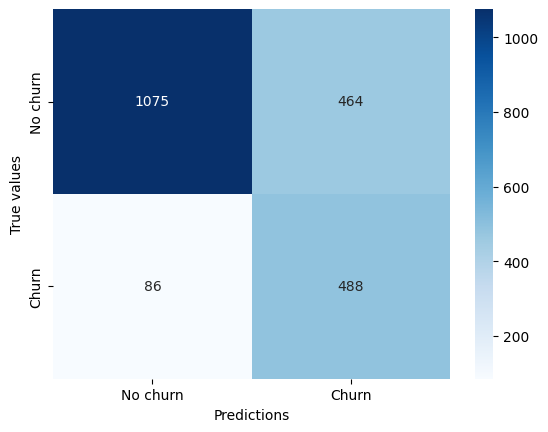

In [236]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No churn', 'Churn' ], yticklabels=['No churn', 'Churn'])
plt.xlabel('Predictions')
plt.ylabel('True values')
plt.show()

In [237]:
y_test.value_counts()

Churn
0    1539
1     574
Name: count, dtype: int64

0ther code....

In [238]:
X_train_data = pd.DataFrame(X_train)

In [239]:
X_train_data.to_csv(r'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\processed\X_train_data.csv', index = False)

In [240]:
Y_train_data = pd.DataFrame(y_train)

In [241]:
Y_train_data.to_csv(r'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\processed\Y_train_data.csv', index = False)

In [242]:
X_test_data = pd.DataFrame(X_test)

In [243]:
X

,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,1,1,0,1,0,29.85
1,34,1,1,0,0,1889.50
2,2,1,0,1,0,108.15
3,45,1,1,0,1,1840.75
4,2,2,0,1,0,151.65
...,...,...,...,...,...,...
7038,24,1,1,1,0,1990.50
7039,72,2,1,1,1,7362.90
7040,11,1,0,1,0,346.45
7041,4,2,0,1,0,306.60


<Axes: >

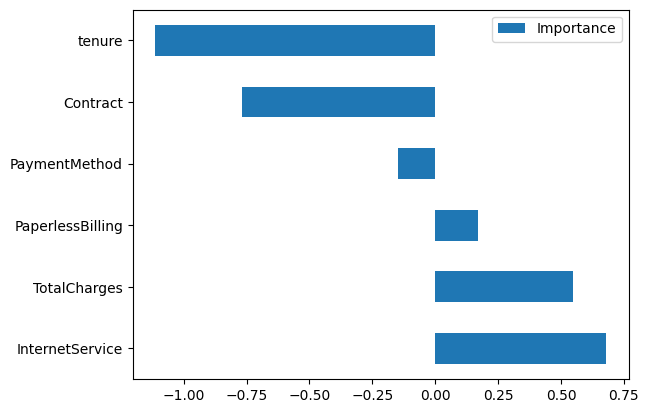

In [245]:
pd.DataFrame(data, index = X.columns ).sort_values(by='Importance', ascending = False).plot(kind="barh")
#pd.DataFrame(xgb_final.feature_importances_, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=True).plot(kind="barh")

In [ ]:
sns.barplot(x=data_df.Importance, y=data_df.Column, palette = 'coolwarm')